In [1]:
import numpy as np
import mylibrary.nnlib as tnn
import mylibrary.splinelib as tsp
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import matplotlib
import copy

matplotlib.rcParams['figure.figsize'] = (12, 8)

#### Dataset 0

In [2]:
num_points = 50
X1 = np.linspace(-2.5, 1.5, num_points)
X2 = np.linspace(-2, 4, num_points)
X1, X2 = np.meshgrid(X1, X2)
Y = np.sin(np.sqrt(X1**2 + X2**2))*2-1.

#### Dataset 1

In [48]:
x1min, x1max, nx1 = -5, 4, 75
x2min, x2max, nx2 = -3, 7, 75
x1, x2 = np.linspace(x1min, x1max, nx1), np.linspace(x2min, x2max, nx2)
X1, X2 = np.meshgrid(x1, x2)

def gaussian(x1, x2, x10, x20, x1alpha, x2alpha, A):
    return A * np.exp( -((x1-x10)/x1alpha)**2 -((x2-x20)/x2alpha)**2)

gprms = [(0, 2, 2.5, 5.4, 1.5),
         (-1, 4, 6, 2.5, 1.8),
         (-3, -0.5, 1, 2, 4),
         (3, 0.5, 2, 1, 5)
        ]
Y = np.zeros(X1.shape)
for p in gprms:
    Y += gaussian(X1, X2, *p)

#### Scaling/Plotting the data

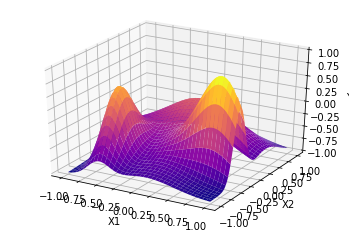

In [49]:
####Scaling the data to range -1,1
X1 = 2*(X1 - X1.min())/(X1.max() - X1.min()) -1
X2 = 2*(X2 - X2.min())/(X2.max() - X2.min()) -1
Y = 2*(Y - Y.min())/(Y.max() - Y.min()) -1

x1 = X1.reshape(-1)
x2 = X2.reshape(-1)

%matplotlib inline
fig = plt.figure()
ax = fig.gca(projection='3d')
# ax.scatter(X1, X2, Y)
ax.plot_surface(X1, X2, Y, cmap='plasma')
ax.set_xlabel('X1')
ax.set_ylabel('X2')
ax.set_zlabel('Y')
plt.show()

In [50]:
xx = np.c_[x1, x2]
yy = Y.reshape(-1,1)

optimizer = tnn.SGD(learning_rate=0.1)

## Using 1 Double Relu Activation function to break the data

In [51]:
layer1 = tnn.LinearLayer(2,1, optimizer=optimizer)
layer2 = tsp.SplineVectorLayer(1, max_points=3)

In [52]:
%matplotlib tk
fig = plt.figure()
ax = fig.gca(projection='3d')

for epoch in range(100000):
    a1 = layer1.forward(xx)
    yout = layer2.forward(a1)
    
    dy = yout - yy
    da1 = layer2.backward(dy)
    dx = layer1.backward(da1)
    
    layer1.update()
    layer2.update()
    
    if epoch%100 == 0:
        error = (dy**2).mean()
        print(epoch, 'Error = ', error)
        ax.clear()
        
        ax.scatter(X1, X2, Y)
        ax.scatter(X1, X2, yout.reshape(-1), color='r', marker='.')
        ax.set_xlabel('X1')
        ax.set_ylabel('X2')
        ax.set_zlabel('Y')
        
        fig.canvas.draw()
        plt.pause(0.01)
        print("\n")
        if error < 0.00025:
            print('fitted to our expectation')
            break

0 Error =  0.4547580973986143


100 Error =  0.12823029111513973


200 Error =  0.12682663395470195


300 Error =  0.126470694316003


400 Error =  0.1262352168856615


500 Error =  0.12601776231728481


600 Error =  0.1258069900057505


700 Error =  0.12559932588085632


800 Error =  0.1253889428825575


900 Error =  0.12517386041831138


1000 Error =  0.12494931333065853


1100 Error =  0.12471105334229449


1200 Error =  0.12445375884669835


1300 Error =  0.12417141969709741


1400 Error =  0.12385739661875218


1500 Error =  0.12349814436977904


1600 Error =  0.12307999967743011


1700 Error =  0.12257578660082323


1800 Error =  0.12194126012851651


1900 Error =  0.121089047602522


2000 Error =  0.11986773321129983


2100 Error =  0.11845825646786141


2200 Error =  0.1172558831834789


2300 Error =  0.11640592782004414


2400 Error =  0.11583003956089097


2500 Error =  0.11541451112613817


2600 Error =  0.11509119945703387


2700 Error =  0.11482477199583233


2800 Error = 

TclError: invalid command name "pyimage282"

In [53]:
l1_A = copy.deepcopy(layer1)
l2_A = copy.deepcopy(layer2)

In [54]:
layer2.spline_list[0].rangeX

array([[1., 1., 1., ..., 0., 0., 0.],
       [0., 0., 0., ..., 1., 1., 1.]])

In [55]:
mask = (layer2.spline_list[0].rangeX[0] == 1.).squeeze()
xx_0, xx_1 = xx[mask], xx[~mask]
xx_0.shape, xx_1.shape

((4069, 2), (1556, 2))

In [56]:
yy_0, yy_1 = yy[mask], yy[~mask]
yy_0.shape, yy_1.shape

((4069, 1), (1556, 1))

### Now training for the next layer of breaks

In [57]:
layer1 = tnn.LinearLayer(2,1, optimizer=optimizer)
layer2 = tsp.SplineVectorLayer(1, max_points=3)

In [58]:
%matplotlib tk
fig = plt.figure()
ax = fig.gca(projection='3d')

for epoch in range(100000):
    a1 = layer1.forward(xx_0)
    yout = layer2.forward(a1)
    
    dy = yout - yy_0
    da1 = layer2.backward(dy)
    dx = layer1.backward(da1)
    
    layer1.update()
    layer2.update()
    
    if epoch%100 == 0:
        error = (dy**2).mean()
        print(epoch, 'Error = ', error)
        ax.clear()
        
        ax.scatter(xx_0[:,0], xx_0[:,1], yy_0.reshape(-1))
        ax.scatter(xx_0[:,0], xx_0[:,1], yout.reshape(-1), color='r', marker='.')
        ax.set_xlabel('X1')
        ax.set_ylabel('X2')
        ax.set_zlabel('Y')
        
        fig.canvas.draw()
        plt.pause(0.01)
        print("\n")
        if error < 0.00025:
            print('fitted to our expectation')
            break

0 Error =  0.17739301856024814


100 Error =  0.12931972095561262


200 Error =  0.1218966623722056


300 Error =  0.10654876654171583


400 Error =  0.09675276234278866


500 Error =  0.09550613883367899


600 Error =  0.09532634968522616


700 Error =  0.09529728108896271


800 Error =  0.09528965096004224


900 Error =  0.09528802865369405


1000 Error =  0.09528752002025961


1100 Error =  0.09528748970870111


1200 Error =  0.09528749305033758


1300 Error =  0.09528748986287044


1400 Error =  0.09528748499817079


1500 Error =  0.09528749455653902


1600 Error =  0.09528748799088191


1700 Error =  0.09528749311534097


TclError: invalid command name "pyimage318"

In [59]:
l1_B_0 = copy.deepcopy(layer1)
l2_B_0 = copy.deepcopy(layer2)

In [66]:
layer1 = tnn.LinearLayer(2,1, optimizer=optimizer)
layer2 = tsp.SplineVectorLayer(1, max_points=3)

In [67]:
%matplotlib tk
fig = plt.figure()
ax = fig.gca(projection='3d')

for epoch in range(100000):
    a1 = layer1.forward(xx_1)
    yout = layer2.forward(a1)
    
    dy = yout - yy_1
    da1 = layer2.backward(dy)
    dx = layer1.backward(da1)
    
    layer1.update()
    layer2.update()
    
    if epoch%100 == 0:
        error = (dy**2).mean()
        print(epoch, 'Error = ', error)
        ax.clear()
        
        ax.scatter(xx_1[:,0], xx_1[:,1], yy_1.reshape(-1))
        ax.scatter(xx_1[:,0], xx_1[:,1], yout.reshape(-1), color='r', marker='.')
        ax.set_xlabel('X1')
        ax.set_ylabel('X2')
        ax.set_zlabel('Y')
        
        fig.canvas.draw()
        plt.pause(0.01)
        print("\n")
        if error < 0.00025:
            print('fitted to our expectation')
            break

0 Error =  0.22901777577570281


100 Error =  0.05244225733909946


200 Error =  0.04500475075269195


300 Error =  0.041178158414579856


400 Error =  0.03861109426592979


500 Error =  0.03702867092156323


600 Error =  0.036187999420824825


700 Error =  0.03580572648775007


800 Error =  0.03564740240325841


900 Error =  0.03558616540579793


1000 Error =  0.03556342722658164


1100 Error =  0.03555516876236752


1200 Error =  0.03555220315413483


1300 Error =  0.03555114419699963


1400 Error =  0.03555076711006871


1500 Error =  0.03555063301528737


1600 Error =  0.035550585363112085


1700 Error =  0.03555056843548182


1800 Error =  0.03555056242342773


1900 Error =  0.03555056028841948


2000 Error =  0.03555055953028502


2100 Error =  0.0355505592610854


2200 Error =  0.035550559165500116


2300 Error =  0.03555055913156102


2400 Error =  0.035550559119510515


2500 Error =  0.03555055911523187


2600 Error =  0.035550559113712694


2700 Error =  0.0355505591131733




TclError: invalid command name "pyimage397"

In [68]:
l1_B_1 = copy.deepcopy(layer1)
l2_B_1 = copy.deepcopy(layer2)

## Adding up the results

In [69]:
%matplotlib tk
fig = plt.figure()
ax = fig.gca(projection='3d')

a1 = l1_B_0.forward(xx_0)
yout_0 = l2_B_0.forward(a1)

a1 = l1_B_1.forward(xx_1)
yout_1 = l2_B_1.forward(a1)

ax.scatter(xx_0[:,0], xx_0[:,1], yy_0.reshape(-1))
ax.scatter(xx_0[:,0], xx_0[:,1], yout_0.reshape(-1), color='r', marker='.')

ax.scatter(xx_1[:,0], xx_1[:,1], yy_1.reshape(-1))
ax.scatter(xx_1[:,0], xx_1[:,1], yout_1.reshape(-1), color='r', marker='.')

ax.set_xlabel('X1')
ax.set_ylabel('X2')
ax.set_zlabel('Y')

Text(0.5, 0, 'Y')